In [1]:
import numpy as np
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Data simulation

In [2]:
a =0.07746
b=0.01078


# Parameters
#n = 10000000  # number of samples
n = 10000000  # number of samples

mu_epsilon, sigma_epsilon = 0, np.sqrt(a)  # parameters for normal distribution ε_j ~ N(0,a^2)
mu_x, sigma_x = 0, np.sqrt(b) # parameters for half-normal distribution x_j ~ N_+(0,b^2)

# Step 1: Generate ε_j ~ N(0,5)
epsilon_j = np.random.normal(mu_epsilon, sigma_epsilon, n)

# Step 2: Generate x_j ~ N_+(0,1) (half-normal)
x_j = np.abs(np.random.normal(mu_x, sigma_x, n))

# Step 3: Compute r_j = x_j + ε_j
r_j = x_j + epsilon_j

# Step 4: Define δ and compute R_j
delta= (sigma_x**2) / (sigma_epsilon**2 + sigma_x**2)

# Compute R_j
R_j = -np.sqrt(delta) * (r_j / sigma_epsilon)

# Step 5: Compute E[x_j | r_j] using the given formula
phi_Rj = norm.pdf(R_j)  # PDF of R_j
Phi_Rj = norm.cdf(R_j)  # CDF of R_j

# Avoid division by zero in case Phi(R_j) is 1
with np.errstate(divide='ignore', invalid='ignore'):
    correction_term = np.where(Phi_Rj < 1, phi_Rj / (1 - Phi_Rj), 0)
    E_xj_given_rj = delta * r_j + np.sqrt(delta) * sigma_epsilon * correction_term


# Plot the kernel density estimate

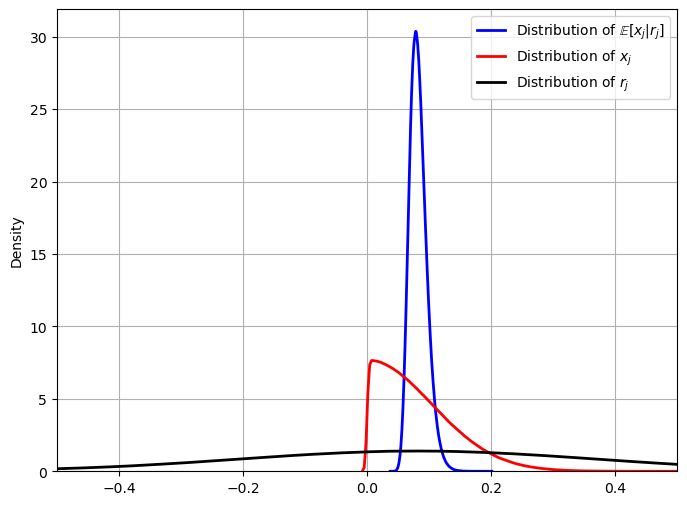

In [3]:

plt.figure(figsize=(8, 6))
sns.kdeplot(E_xj_given_rj, color='blue', label=r'Distribution of $\mathbb{E}[x_{j}|r_{j}]$', linewidth=2)
sns.kdeplot(x_j, color='red', label=r'Distribution of $x_j$', linewidth=2)
sns.kdeplot(r_j, color='black', label=r'Distribution of $r_j$', linewidth=2)
plt.xlim(-.5, .5)  # Set the x-axis range
plt.ylabel('Density')
plt.legend()
plt.grid(True)
# Save the plot as a PDF
plt.savefig("distribution_plot.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [4]:
error=  E_xj_given_rj - x_j

<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\o'
<>:27: SyntaxWarning: invalid escape sequence '\o'
<>:28: SyntaxWarning: invalid escape sequence '\o'
C:\Users\jayho\AppData\Local\Temp\ipykernel_14376\1148369226.py:27: SyntaxWarning: invalid escape sequence '\o'
  plt.ylabel('$\omega =\mathbb{E}[x_{j}|r_{j}]-x_{j}$')
C:\Users\jayho\AppData\Local\Temp\ipykernel_14376\1148369226.py:28: SyntaxWarning: invalid escape sequence '\o'
  plt.title('$\omega$ vs $x_j$')


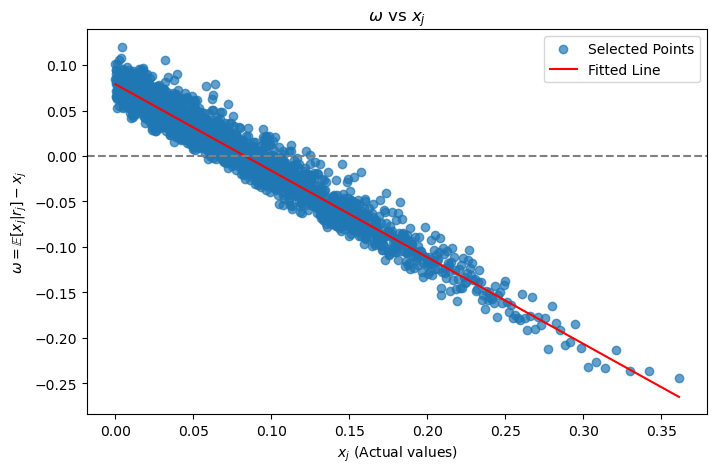

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sort by x_j for consistent plotting
sorted_idx = np.argsort(x_j)
x_j_sorted = x_j[sorted_idx]
error_sorted = error[sorted_idx]

# Take every k-th point (e.g., every 50th)
step = 5000
x_sample = x_j_sorted[::step].reshape(-1, 1)
error_sample = error_sorted[::step]

# Fit a linear regression line to sampled points
model = LinearRegression()
model.fit(x_sample, error_sample)
line_x = np.linspace(x_sample.min(), x_sample.max(), 100).reshape(-1, 1)
line_y = model.predict(line_x)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(x_sample, error_sample, alpha=0.7, label='Selected Points')
plt.plot(line_x, line_y, color='red', label='Fitted Line')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('$x_j$ (Actual values)')
plt.ylabel('$\omega =\mathbb{E}[x_{j}|r_{j}]-x_{j}$')
plt.title('$\omega$ vs $x_j$')
plt.legend()

# Save as PDF
plt.savefig(r"C:\Users\jayho\OneDrive - Duke University\ABF_PatValue_Research\Code\simulatation\error_vs_xj.png", format='png', bbox_inches='tight')


plt.show()